### Objective
Create a predictive models to predict S&P 500 stock index based on interest rates and employment numbers.
- Independent variable X: Interest rates and Employment numbers.
- Dependent variable Y: Stock market price.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

### Data Understanding

In [2]:
stock_df = pd.read_csv("E:\\Bagas's File\\Data Science Bagas\\Material\\ML Regression Course Package\\6. Multiple Linear Regression\\S&P500_Stock_Data.csv")

In [3]:
stock_df.head()

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337
3,1.977960,49.908353,2140.434475
4,2.437723,52.035492,2411.275663


In [4]:
stock_df.tail()

,Interest Rates,Employment,S&P 500 Price
995,2.528420,52.390828,2578.699184
996,2.643571,54.626204,2573.865933
997,2.009644,57.004357,2004.911218
998,2.201656,62.447790,2344.098981
999,2.180638,46.297034,2156.133786


In [5]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Interest Rates  1000 non-null   float64
 1   Employment      1000 non-null   float64
 2   S&P 500 Price   1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [6]:
stock_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Interest Rates,1000.0,2.195392,0.241630,1.5,2.035735,2.198214,2.359061,3.0
Employment,1000.0,56.254855,4.862178,40.0,53.029784,56.160941,59.422633,70.0
S&P 500 Price,1000.0,2319.999936,193.854745,1800.0,2190.447901,2312.443024,2455.764328,3000.0


In [7]:
display(stock_df.shape)
display(stock_df.columns)

(1000, 3)

Index(['Interest Rates', 'Employment', 'S&P 500 Price'], dtype='object')

In [8]:
stock_df.isnull().sum()

Interest Rates    0
Employment        0
S&P 500 Price     0
dtype: int64

In [9]:
stock_df.duplicated().sum()

0

### Visualize the Data

<Figure size 800x600 with 0 Axes>

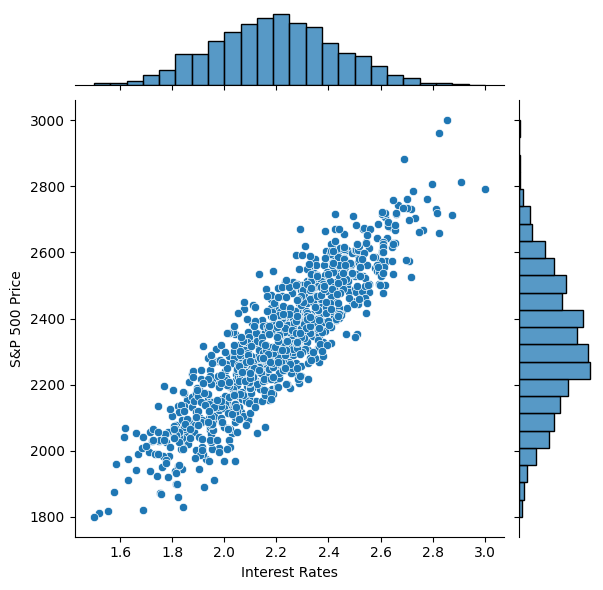

In [10]:
plt.figure(figsize=(8,6))
sns.jointplot(x='Interest Rates', y='S&P 500 Price', data=stock_df)
plt.show()

<Figure size 800x600 with 0 Axes>

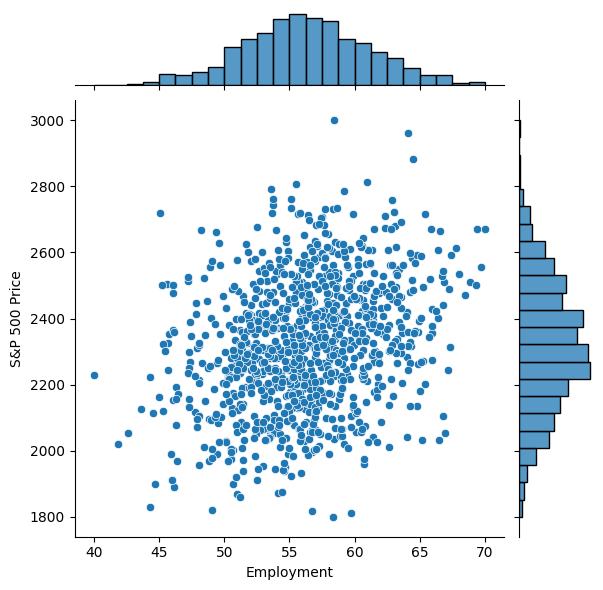

In [11]:
plt.figure(figsize=(8,6))
sns.jointplot(x='Employment', y='S&P 500 Price', data=stock_df)
plt.show()

<Figure size 800x600 with 0 Axes>

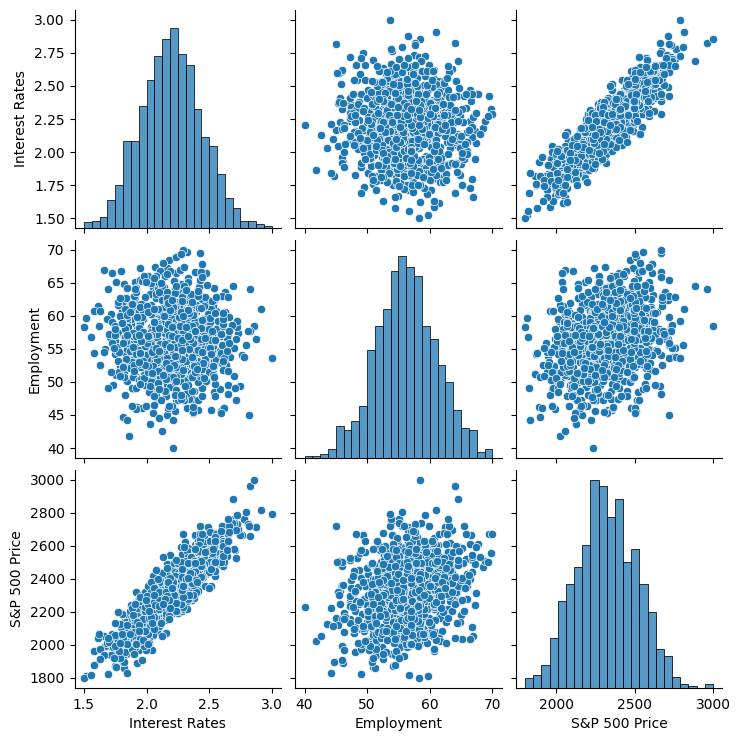

In [12]:
plt.figure(figsize=(8,6))
sns.pairplot(data=stock_df)
plt.show()

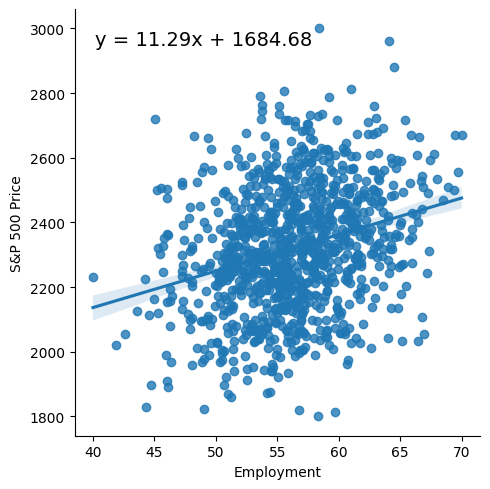

In [13]:
slope, intercept, r_value, p_value, std_err = stats.linregress(stock_df['Employment'], stock_df['S&P 500 Price'])
plot = sns.lmplot(x='Employment', y='S&P 500 Price', data=stock_df)
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.gca().text(0.05, 0.95, equation, transform=plt.gca().transAxes, size=14, verticalalignment='top')
plt.show()

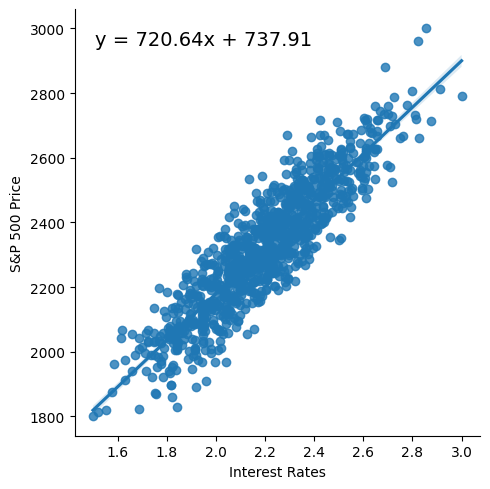

In [14]:
slope, intercept, r_value, p_value, std_err = stats.linregress(stock_df['Interest Rates'], stock_df['S&P 500 Price'])
plot = sns.lmplot(x='Interest Rates', y='S&P 500 Price', data=stock_df)
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.gca().text(0.05, 0.95, equation, transform=plt.gca().transAxes, size=14, verticalalignment='top')
plt.show()

### Create Training and Testing Set

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = stock_df[['Interest Rates', 'Employment']]
y = stock_df['S&P 500 Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train

,Interest Rates,Employment
29,2.150986,58.010265
535,2.459592,57.901514
695,2.283244,53.854280
557,1.886176,49.068649
836,1.688420,49.022016
...,...,...
106,2.610948,46.050119
270,1.889670,57.611213
860,2.522460,57.630422
435,1.821877,51.242539


In [18]:
y_train

29     2301.183322
535    2615.466509
695    2215.769849
557    1977.181068
836    1822.236989
          ...     
106    2476.652270
270    2175.005338
860    2556.667869
435    1860.986179
102    2230.842487
Name: S&P 500 Price, Length: 800, dtype: float64

In [19]:
display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(800, 2)

(800,)

(200, 2)

(200,)

### Train the Models

In [25]:
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

In [21]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)

LinearRegression()

In [68]:
coeff_df = pd.DataFrame(lr.coef_, index=X_train.columns, columns=['Coefficient'])
coeff_df.loc['Intercept'] = lr.intercept_
coeff_df

,Coefficient
Interest Rates,727.552576
Employment,12.317423
Intercept,30.904978


In [50]:
x_surf, y_surf = np.meshgrid(np.linspace(X_train['Interest Rates'].min(), X_train['Interest Rates'].max(), 100), np.linspace(X_train['Employment'].min(), X_train['Employment'].max(), 100))

In [51]:
onlyX = pd.DataFrame({'Interest Rates': x_surf.ravel(),'Employment': y_surf.ravel()})

In [52]:
fittedY = lr.predict(onlyX)
fittedY = fittedY.reshape(x_surf.shape)

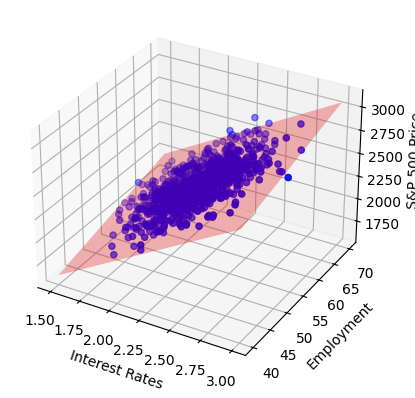

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['Interest Rates'], X_train['Employment'], y_train, color='blue', marker='o', label='Actual')
ax.plot_surface(x_surf, y_surf, fittedY, color='red', alpha=0.3, label='Prediction Surface')
ax.set_xlabel('Interest Rates')
ax.set_ylabel('Employment')
ax.set_zlabel('S&P 500 Price')
plt.show()

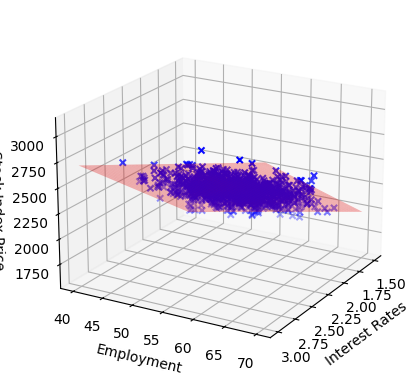

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(stock_df['Interest Rates'], stock_df['Employment'], stock_df['S&P 500 Price'], c='blue', marker='x')
ax.plot_surface(x_surf, y_surf, fittedY, color='red', alpha=0.3)
ax.set_xlabel('Interest Rates')
ax.set_ylabel('Employment')
ax.set_zlabel('Stock Index Price')
ax.view_init(20,30)
plt.show()

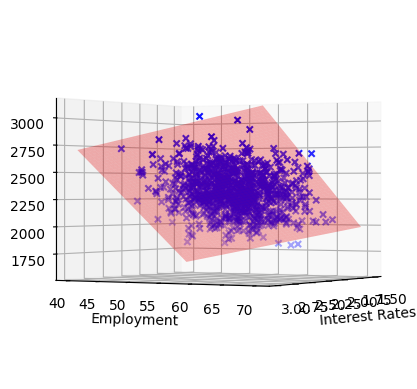

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(stock_df['Interest Rates'], stock_df['Employment'], stock_df['S&P 500 Price'], c='blue', marker='x')
ax.plot_surface(x_surf, y_surf, fittedY, color='red', alpha=0.3)
ax.set_xlabel('Interest Rates')
ax.set_ylabel('Employment')
ax.set_zlabel('Stock Index Price')
ax.view_init(0,30)
plt.show()

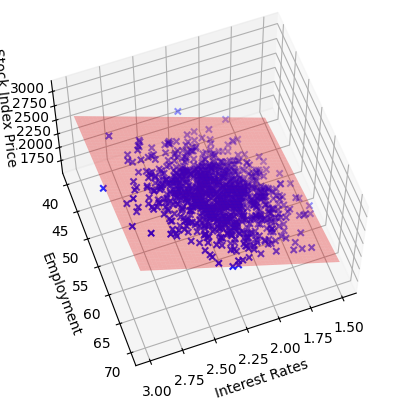

In [58]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(stock_df['Interest Rates'], stock_df['Employment'], stock_df['S&P 500 Price'], c='blue', marker='x')
ax.plot_surface(x_surf, y_surf, fittedY, color='red', alpha=0.3)
ax.set_xlabel('Interest Rates')
ax.set_ylabel('Employment')
ax.set_zlabel('Stock Index Price')
ax.view_init(60,70)
plt.show()

### Test the Models

In [69]:
x_surf_test, y_surf_test = np.meshgrid(np.linspace(X_test['Interest Rates'].min(), X_test['Interest Rates'].max(), 100), np.linspace(X_test['Employment'].min(), X_test['Employment'].max(), 100))

In [81]:
onlyX_test = pd.DataFrame({'Interest Rates': x_surf_test.ravel(),'Employment': y_surf_test.ravel()})

In [100]:
fittedY_test = lr.predict(onlyX_test)
fittedY_test = fittedY_test.reshape(x_surf_test.shape)

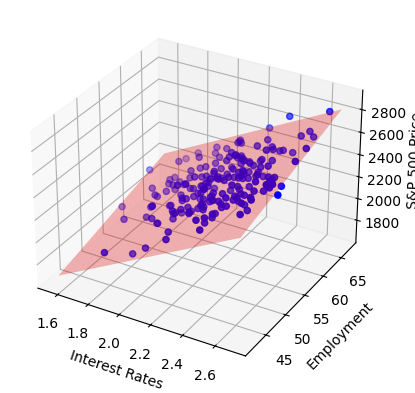

In [101]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['Interest Rates'], X_test['Employment'], y_test, color='blue', marker='o', label='Actual')
ax.plot_surface(x_surf_test, y_surf_test, fittedY_test, color='red', alpha=0.3, label='Prediction Surface')
ax.set_xlabel('Interest Rates')
ax.set_ylabel('Employment')
ax.set_zlabel('S&P 500 Price')
plt.show()

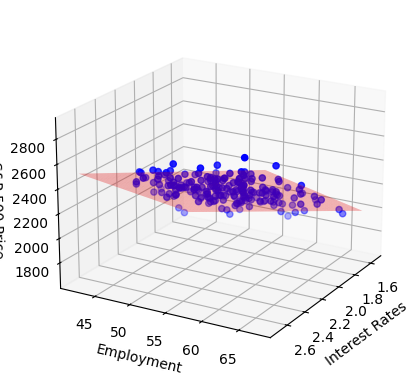

In [102]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['Interest Rates'], X_test['Employment'], y_test, color='blue', marker='o', label='Actual')
ax.plot_surface(x_surf_test, y_surf_test, fittedY_test, color='red', alpha=0.3, label='Prediction Surface')
ax.set_xlabel('Interest Rates')
ax.set_ylabel('Employment')
ax.set_zlabel('S&P 500 Price')
ax.view_init(20,30)
plt.show()

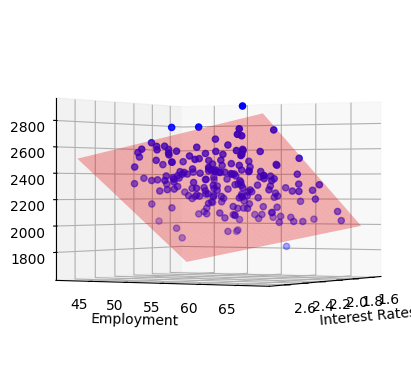

In [103]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['Interest Rates'], X_test['Employment'], y_test, color='blue', marker='o', label='Actual')
ax.plot_surface(x_surf_test, y_surf_test, fittedY_test, color='red', alpha=0.3, label='Prediction Surface')
ax.set_xlabel('Interest Rates')
ax.set_ylabel('Employment')
ax.set_zlabel('S&P 500 Price')
ax.view_init(0,30)
plt.show()

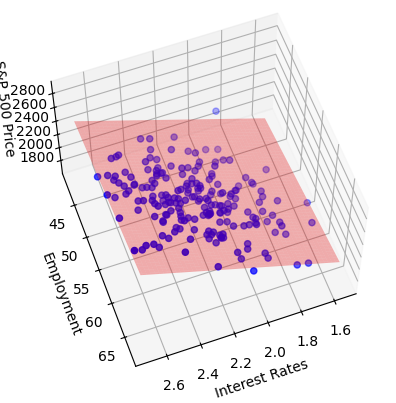

In [104]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['Interest Rates'], X_test['Employment'], y_test, color='blue', marker='o', label='Actual')
ax.plot_surface(x_surf_test, y_surf_test, fittedY_test, color='red', alpha=0.3, label='Prediction Surface')
ax.set_xlabel('Interest Rates')
ax.set_ylabel('Employment')
ax.set_zlabel('S&P 500 Price')
ax.view_init(60,70)
plt.show()

### Evaluate the Models

In [105]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [106]:
y_predict_train = lr.predict(X_train)
y_predict_test = lr.predict(X_test)

#### Training Model Evaluation

In [107]:
r2 = r2_score(y_train, y_predict_train)
mae = mean_absolute_error(y_train, y_predict_train)
mse = mean_squared_error(y_train, y_predict_train)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_train, y_predict_train)
n = len(y_train)
p = X_test.shape[1]
adjusted_r2 = 1 - ((1-r2) * (n-1) / (n-p-1))

print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Adjusted R-squared: {adjusted_r2}')

R-squared: 0.9025616211960653
Mean Absolute Error: 50.00979940710091
Mean Squared Error: 3749.696912039774
Root Mean Squared Error: 61.23476881674147
Mean Absolute Percentage Error: 0.021669286334071485
Adjusted R-squared: 0.9023171083257919


#### Testing Model Evaluation

In [108]:
r2 = r2_score(y_test, y_predict_test)
mae = mean_absolute_error(y_test, y_predict_test)
mse = mean_squared_error(y_test, y_predict_test)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_predict_test)
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - ((1-r2) * (n-1) / (n-p-1))

print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Adjusted R-squared: {adjusted_r2}')

R-squared: 0.8958792642873612
Mean Absolute Error: 47.226784702743835
Mean Squared Error: 3513.6046173635777
Root Mean Squared Error: 59.27566631733107
Mean Absolute Percentage Error: 0.020510825028163995
Adjusted R-squared: 0.8948222009806339
